In [ ]:
 ## Lab- 04
 ## To perform Logistic regression
 ## Task 1 and Task 4

In [ ]:
from sklearn.datasets import make_classification ## used to generate dataset
from matplotlib import pyplot as plt ## for plotting
from sklearn.linear_model import LogisticRegression ## Used for performing logistic regression
from sklearn.model_selection import train_test_split ## used to split dataset into training and test datasets
from sklearn.metrics import confusion_matrix ## used to generate the confusion matrix of the classifiers
import pandas as pd ## managing datasets
from sklearn.metrics import roc_curve,roc_auc_score ## used to generate roc curve and auc score

In [ ]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
) ## Generate the dataset for logistic regression

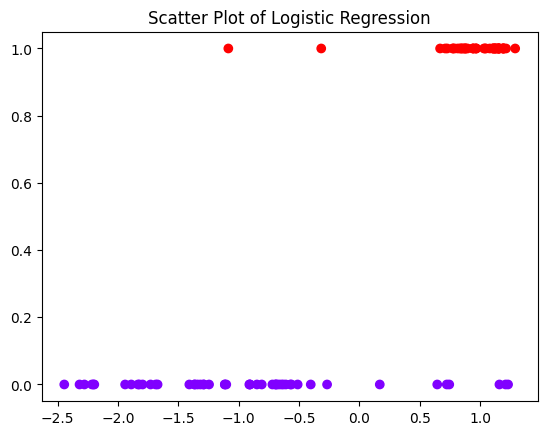

In [ ]:
plt.scatter(x, y, c=y, cmap='rainbow') ## Create a scatter plot
plt.title('Scatter Plot of Logistic Regression')
plt.show()

In [ ]:
df = pd.DataFrame({'x': x[:, 0], 'y': y})
print(df)

           x  y
0  -1.823575  0
1   0.850894  1
2  -0.697408  0
3   0.728120  1
4  -1.114874  0
..       ... ..
95  1.129144  1
96 -1.890682  0
97 -0.630426  0
98  1.232511  0
99 -1.341581  0

[100 rows x 2 columns]


In [ ]:
# Split the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [ ]:
# Create a Logistic Regression Object, perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Show to Coeficient and Intercept
print(log_reg.coef_)
print(log_reg.intercept_)

[[3.23824526]]
[-0.38648897]


In [ ]:
# Perform prediction using the test dataset
y_pred = log_reg.predict(x_test)

In [ ]:
# Show the Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[13,  0],
       [ 0, 12]])

In [ ]:
y_pred_proba = log_reg.predict_proba(x_test)[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)


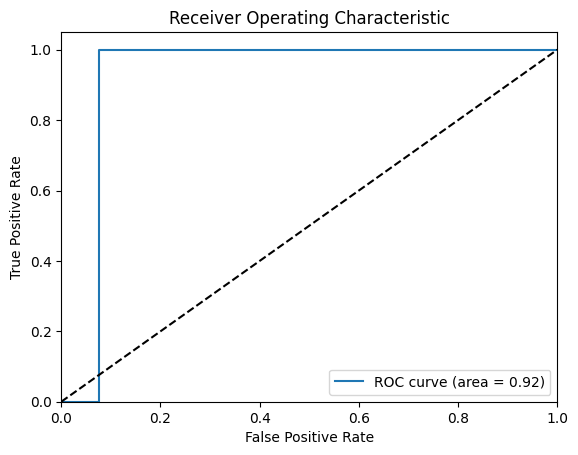

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc_score = roc_auc_score(y_test, y_pred_proba)
print(auc_score)

0.9230769230769231
